so the idea is test the correlation of transform data from **PCA** and **SFA**

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preparations

In [2]:
data = pd.read_csv('./data/faulty_training.csv')

In [3]:
data.head()
# we need to remove 3 first column in the dataframe

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


In [4]:
data.shape

(804999, 55)

In [5]:
data = data.drop(['simulationRun', 'sample', 'faultNumber'], axis=1)

In [6]:
data.head()
# so we only get the numeric feature from the data
# or sensors data

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


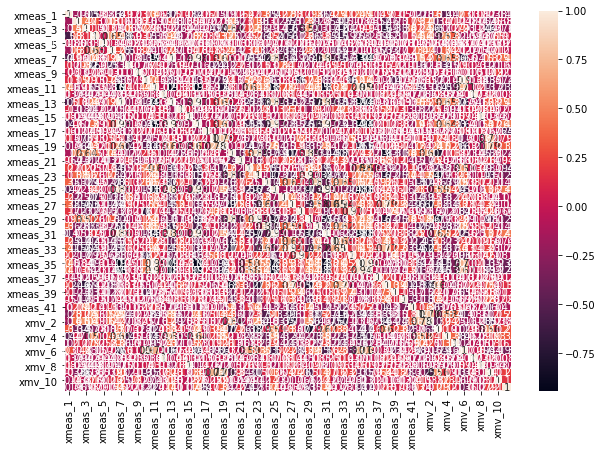

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

## normalize the data

In [8]:
# scaling the data
from sklearn.preprocessing import StandardScaler

x = StandardScaler()

In [9]:
x = x.fit_transform(data)

In [10]:
# put the data into pandas dataframe
x = pd.DataFrame(x, columns=data.columns)

In [11]:
x.head()

,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,-0.073922,0.232134,0.208092,-0.377642,-0.051695,0.118728,-0.247350,-0.015405,0.134127,-0.097424,...,-0.110555,-0.283240,-0.094095,-0.077707,0.001024,1.450039,0.557744,-0.175229,-0.084183,-0.085553
1,-0.069185,-0.104119,0.456114,0.151911,-0.777436,0.663817,-0.238161,0.085956,0.134127,-0.120391,...,-0.173674,-0.286601,-0.539690,-0.082467,0.019585,0.166640,-1.159850,-0.179957,-0.074252,-0.333233
2,-0.073922,-0.083391,-0.252008,0.196040,-0.112173,-0.921328,-0.222408,-0.083473,0.271575,-0.127003,...,0.006692,-0.282802,-0.266229,-0.055886,0.024822,0.315105,0.110705,-0.177621,-0.089984,0.326192
3,-0.077991,-0.060360,0.056223,0.291382,-0.617600,-0.943257,-0.209280,0.251685,-0.140769,-0.128163,...,-0.071919,-0.279928,-0.458710,-0.065135,0.025823,0.002512,0.466477,-0.166798,-0.046328,-0.156319
4,0.217399,0.347289,-0.079470,-0.088622,-0.051695,0.895637,-0.236848,0.373022,-0.140769,-0.234994,...,-0.127004,-0.081586,-0.341919,-0.094769,-0.059895,1.324730,0.510421,-0.184571,-0.059700,-0.082786


# PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30)

In [13]:
pcat = pca.fit_transform(x)

In [14]:
# the data before performing pca
x.shape

(804999, 52)

In [15]:
# the data after performing pca
pcat.shape

(804999, 30)

# SFA

In [16]:
from sksfa import SFA

sfa = SFA(n_components=30)

In [17]:
sfat = sfa.fit_transform(x)

In [18]:
# the data before performing sfa
x.shape

(804999, 52)

In [19]:
# the data after performing sfa
sfat.shape

(804999, 30)

## PCA and SFA collinearity test
#### PCA

In [20]:
num30 = [np.arange(1,31)]

In [21]:
num30

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])]

In [22]:
pca_dt = pd.DataFrame(pcat, columns=num30)

In [23]:
pca_dt.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,-0.833191,-0.012784,-0.224489,-0.308893,1.757090,-1.255518,-0.087761,0.285759,0.062753,-0.189083,...,-0.174631,-0.179847,-0.020462,0.065945,-0.156549,-0.073162,-0.200022,-0.066210,0.001533,-0.007526
1,-0.713351,0.486707,-0.174047,-0.132460,-1.081979,-1.109811,0.592400,-0.763550,0.091208,-0.087233,...,-0.277323,0.138606,-0.043532,0.426193,-0.555931,0.219044,-0.013104,0.419785,-0.082592,-0.003026
2,-0.747525,-0.027865,-0.176452,-0.463509,0.194958,-0.337645,0.244884,1.367832,-0.268621,-0.510644,...,0.044669,-0.223199,-0.359779,-0.328816,0.728276,-0.476847,0.335074,-0.085726,-0.184404,0.224371
3,-0.892904,0.283623,-0.090833,-0.548323,0.380268,0.355247,0.044600,0.092747,-0.042080,-0.276393,...,0.408160,-0.405623,-0.199412,-0.106369,0.607105,0.012417,0.379177,0.173557,-0.179491,0.245919
4,-0.267048,0.298819,-0.184977,-0.346391,1.723473,-1.153064,-0.187140,0.082354,0.071814,0.077739,...,-0.453415,-0.046071,0.916194,0.170417,-0.350825,-0.119624,-0.454545,0.538581,-0.098056,0.999769


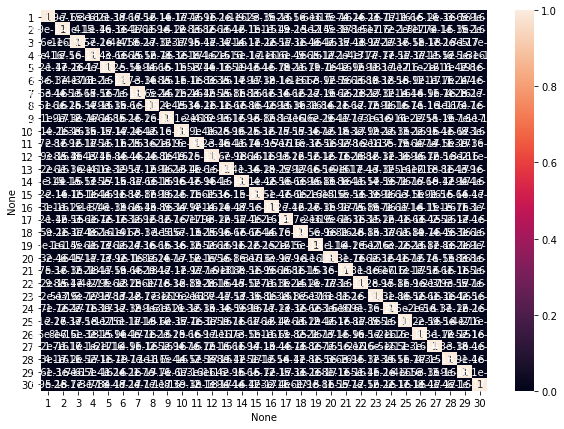

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(pca_dt.corr(), annot=True)

#### SFA

In [25]:
sfa_dt = pd.DataFrame(sfat, columns=num30)

In [26]:
sfa_dt.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,0.224154,-0.040351,0.026584,0.056030,0.058558,-0.064605,0.040129,0.262343,0.154858,0.075579,...,0.065597,0.218027,0.067847,-0.086395,-0.008064,0.023042,-0.100454,0.061722,-0.369822,0.098840
1,0.223621,-0.041875,0.035649,0.042460,0.055769,-0.050359,0.047451,0.256799,0.165405,0.070129,...,-0.399003,-0.016890,-0.304855,0.033098,-0.005195,-0.015915,0.254655,0.527009,0.068964,-0.274713
2,0.214744,-0.044954,0.022887,0.060099,0.082705,-0.087637,0.028770,0.238975,0.138051,0.125662,...,-0.378993,-0.002306,-0.125523,0.046836,-0.050190,-0.001906,0.379704,-0.570939,-0.293867,-0.077688
3,0.234599,-0.043960,0.019313,0.064397,0.033407,0.041159,0.031373,0.227284,0.215898,-0.060059,...,-0.306087,-0.101251,-0.168190,0.074967,-0.055504,-0.000647,0.320553,-0.358763,-0.150570,-0.092748
4,0.231699,-0.029769,0.035237,0.054847,0.041899,0.014727,0.009035,0.266167,0.089777,-0.113076,...,-0.023256,0.250291,-0.153993,0.241347,0.010664,0.030873,0.265766,0.281815,-0.064938,1.724914


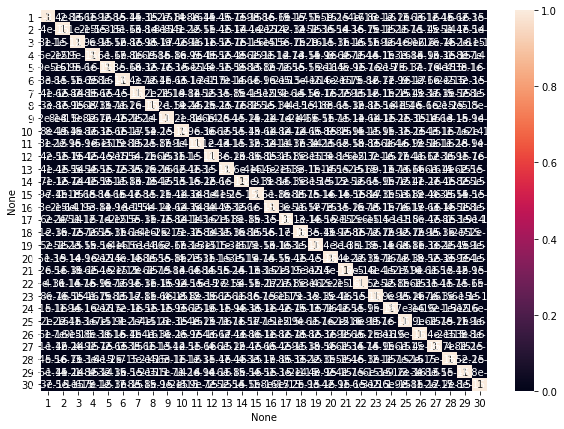

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(sfa_dt.corr(), annot=True)

### Conclusion 
both PCA and SFA have result of removing multicolinearity on the dataset